# Exercícios de análise de dados com pandas e matplotlib

##### Para realizar o exercício, forneci os atributos da base de dados ao chatGPT e pedi que gerasse uma série de questões para responder usando a biblioteca pandas.

1. Qual é a distribuição de gênero entre os diferentes tipos de clientes?
2. Existe alguma correlação entre a renda bruta e o total de vendas?
3. Quais são as linhas de produtos mais vendidas em cada filial?
4. Qual a média de preço unitário por linha de produto?
5. Como a avaliação dos produtos varia em relação ao tipo de cliente?
6. Qual é a porcentagem de margem bruta por filial?
7. Há uma relação entre o tempo de compra e o valor total da fatura?
8. Existe sazonalidade nas vendas com base nas datas?
9. Qual é a modalidade de pagamento mais utilizada?
10. Qual é a média de COGS (Custo dos Produtos Vendidos) por linha de produto?
11. Quais são os meses do ano com maior e menor renda bruta?
12. Há uma diferença significativa na avaliação entre diferentes filiais?
13. Existe uma tendência de crescimento ou declínio nas vendas ao longo do tempo?
14. Quais são os tipos de clientes que contribuem mais para a margem bruta total?

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, datetime as dt

In [2]:
df = pd.read_csv(r'C:\Users\guilh\OneDrive\Documentos\Python Scripts\SuperMercados_Exercicio_Pandas.csv')
df

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,"1120,35",7,"7842,45",1/5/2019,13:08:00,PIX,"4705,47",4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,"229,2",5,1146,3/8/2019,10:29:00,Dinheiro,"1031,4",4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,"694,95",7,"4864,65",3/3/2019,13:23:00,Cartão de Crédito,"3405,255",4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,"873,3",8,"6986,4",1/27/2019,20:33:00,PIX,"4191,84",4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,"1294,65",7,"9062,55",2/8/2019,10:37:00,PIX,"6796,9125",4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Normal,M,Saúde e beleza,"605,25",1,"605,25",1/29/2019,13:46:00,PIX,"363,15",4761904762,20175,62
996,996,303-96-2227,B,Normal,F,Casa e estilo de vida,"1460,7",10,14607,3/2/2019,17:16:00,PIX,"10224,9",4761904762,4869,44
997,997,727-02-1313,A,Member,M,Comida e bebidas,"477,6",1,"477,6",2/9/2019,13:22:00,Dinheiro,"405,96",4761904762,1592,77
998,998,347-56-2442,A,Normal,M,Casa e estilo de vida,"987,3",1,"987,3",2/22/2019,15:33:00,Dinheiro,"691,11",4761904762,3291,41


### Qual é a distribuição de gênero entre os diferentes tipos de clientes?

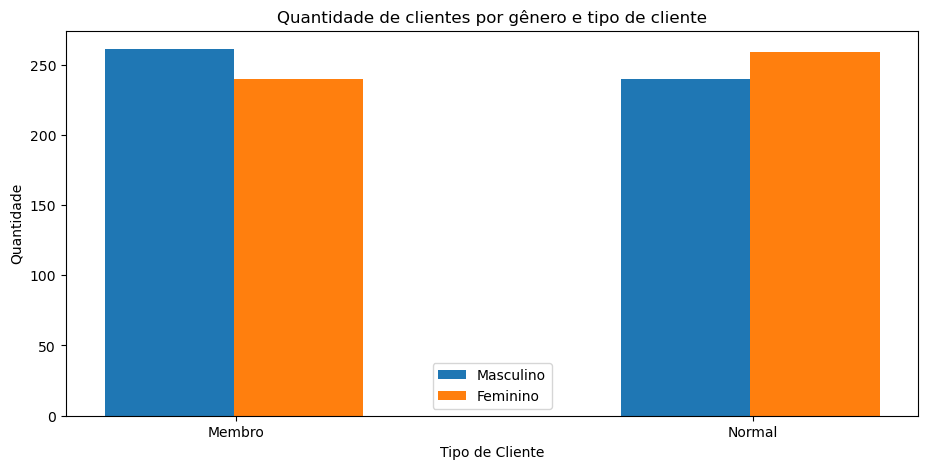

In [3]:
# Agrupando por tipo de cliente e gênero; resetando index "Gênero" para que se torne uma coluna
valores = df.groupby(['Tipo de Cliente', 'Gênero']).count().reset_index(level='Gênero')

# Gerando lista com valores de cada gênero em cada categoria; Ordenando df retornado por tipo de cliente
# A ordem dos valores na lista define a qual tipo de cliente o valor pertence no gráfico
femininos = valores.loc[ valores['Gênero'] == 'M' ].sort_values(by='Tipo de Cliente').iloc[:, 1].tolist()
masculinos = valores.loc[ valores['Gênero'] == 'F' ].sort_values(by='Tipo de Cliente').iloc[:, 1].tolist()

largura_barras = 0.25

# Definindo um range para as categorias do eixo X (Tipo de Cliente)
rg = range( len(df['Tipo de Cliente'].unique().tolist()) )

# Gerando as posições dos gráficos com base na quantidade de categorias do eixo X (Tipo de Cliente)
posicao_1 = [v + largura_barras for v in rg]
posicao_2 = [v + largura_barras for v in posicao_1]

# Gerando o gráfico
plt.figure( figsize=(11, 5) ) # Configuração da janela do gráfico

plt.bar(posicao_1, masculinos, largura_barras, label='Masculino')
plt.bar(posicao_2, femininos, largura_barras, label='Feminino')
plt.xticks([0.38, 1.38], ['Membro', 'Normal'])

# Customizações
plt.xlabel('Tipo de Cliente')
plt.ylabel('Quantidade')
plt.title('Quantidade de clientes por gênero e tipo de cliente')
plt.legend()
plt.show()

### Existe alguma correlação entre a renda bruta e o total de vendas?

In [4]:
df['Total'] = df['Total'].str.replace(',', '.').astype(float)

df['renda bruta'] = df['renda bruta'].astype(str)

df['renda bruta'] = df['renda bruta'].apply(lambda x: x[0:3]+'.'+x[4:] if len(x) > 4 else x).astype(float)

In [5]:
correlacao = df['renda bruta'].corr( df['Total'] )

if correlacao > 0:
    print(f'Correlação positiva, o que indica que as variáveis crescem proporcionalmente.\n\nValor: {correlacao}')
else:    
    print(f'Correlação negativa, o que indica que as variáveis são inversamente proporcionais.\n\nCorrelação: {correlacao}')

Correlação negativa, o que indica que as variáveis são inversamente proporcionais.

Correlação: -0.3008979870437088


### Quais são as linhas de produtos mais vendidas em cada filial?

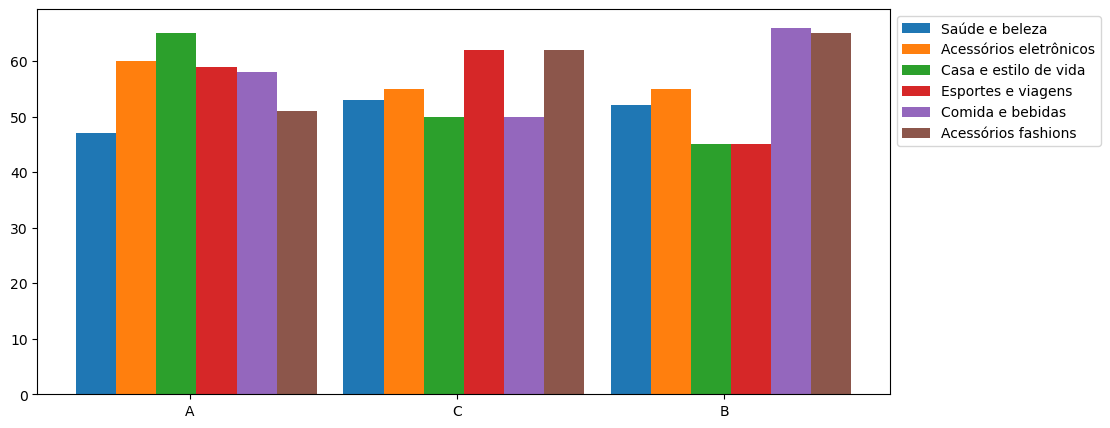

In [6]:
# Agrupando valores por filial e linha de produto
valores = df.groupby(['Filial', 'Linha de produto']).count().reset_index('Linha de produto')

# Lista com as subcategorias
subcategorias = df['Linha de produto'].unique().tolist()
categorias = df['Filial'].unique().tolist() 
largura_barras = 0.15

# Definindo as posições de cada coluna
rg = range( len(categorias))
posicao_1 = [v + largura_barras for v in rg]
posicao_2 = [v + largura_barras for v in posicao_1]
posicao_3 = [v + largura_barras for v in posicao_2]
posicao_4 = [v + largura_barras for v in posicao_3]
posicao_5 = [v + largura_barras for v in posicao_4]
posicao_6 = [v + largura_barras for v in posicao_5]

posicoes = [posicao_1, posicao_2, posicao_3, posicao_4, posicao_5, posicao_6]

# Gerando o gráfico
plt.figure( figsize=(11, 5) ) # Configuração da janela do gráfico

for i, subcategoria in enumerate(subcategorias):
    
    valores_grafico = valores.loc[ valores['Linha de produto'] == subcategoria  ].iloc[:, 1]
    plt.bar(posicoes[i], valores_grafico, largura_barras, label=subcategoria)

plt.xticks([0.5, 1.5, 2.5], categorias)

# Customizações
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Qual a média de preço unitário por linha de produto?

In [7]:
df['Preço unitário'] = df['Preço unitário'].str.replace(',', '.').astype(float)

df.groupby('Linha de produto')['Preço unitário'].mean()

Linha de produto
Acessórios eletrônicos    748.185882
Acessórios fashions       794.044382
Casa e estilo de vida     761.688750
Comida e bebidas          727.306897
Esportes e viagens        783.283735
Saúde e beleza            720.536842
Name: Preço unitário, dtype: float64

### Como a avaliação dos produtos varia em relação ao tipo de cliente?

In [8]:
nova_categoria = []
for v in df['Avaliação']:
    
    if v <= 20:
        nova_categoria.append('0 - Muito ruim')
    elif v > 20 and v <= 40:
        nova_categoria.append('1 - Ruim')
    elif v > 40 and v <= 60:
        nova_categoria.append('2 - Neutro')
    elif v > 60 and v <= 80:
        nova_categoria.append('3 - Bom')
    elif v > 80:
        nova_categoria.append('4 - Muito bom')

df['Categoria_Avaliação'] = nova_categoria

valores = df.groupby(['Tipo de Cliente', 'Categoria_Avaliação']).count().reset_index(['Categoria_Avaliação', 'Tipo de Cliente']).iloc[:, :3]

valores = valores.sort_values(['Tipo de Cliente', 'Categoria_Avaliação'])

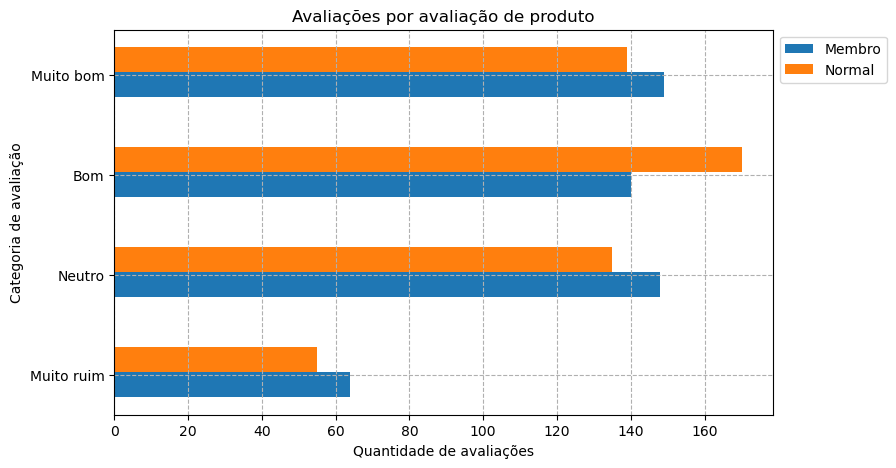

In [9]:
avaliacoes_membro = valores.loc[ valores['Tipo de Cliente'] == 'Member', 'Unnamed: 0' ].tolist()
avaliacoes_normal = valores.loc[ valores['Tipo de Cliente'] == 'Normal', 'Unnamed: 0' ].tolist()

categorias = valores['Categoria_Avaliação'].unique().tolist()
# Configurando as posições de cada coluna
rg = [v+0.25 for v in range(len(avaliacoes_membro))]
p1 = [v+0.25 for v in rg]
p2 = [v+0.25 for v in p1]

# Gerando o gráfico
plt.figure(figsize=(8.5, 5))

plt.barh(p1, avaliacoes_membro, 0.25, label='Membro')
plt.barh(p2, avaliacoes_normal, 0.25, label='Normal')
plt.yticks([0.6, 1.6, 2.6, 3.6], [v[4:] for v in categorias])

# Customizações
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Quantidade de avaliações')
plt.ylabel('Categoria de avaliação')
plt.title('Avaliações por avaliação de produto')
plt.grid(ls='--');
plt.show()

### Qual é a porcentagem de margem bruta por filial?

In [10]:
total = df['renda bruta'].sum()
agrupamento = df.groupby('Filial')['renda bruta'].sum().reset_index('Filial')

agrupamento['Percentual'] = (agrupamento['renda bruta'] / total) * 100

agrupamento['Percentual'] = agrupamento['Percentual'].apply(lambda x: str(x)[:5] + '%')

agrupamento

,Filial,renda bruta,Percentual
0,A,700101.35,35.29%
1,B,694576.35,35.01%
2,C,589119.85,29.69%


### Há uma relação entre o tempo de compra e o valor total da fatura?

In [11]:
categorias = []

for v in df['Tempo'].str.replace(':', '').astype(int):
    
    if v >= 70000 and v < 120000:
        categorias.append('Manhã')
    if v >= 120000 and v < 180000:
        categorias.append('Tarde')
    if v >= 180000 and v < 235959:
        categorias.append('Noite')
    if v >= 0 and v < 70000:
        categorias.append('Outros')
    
df['Tempo'] = categorias

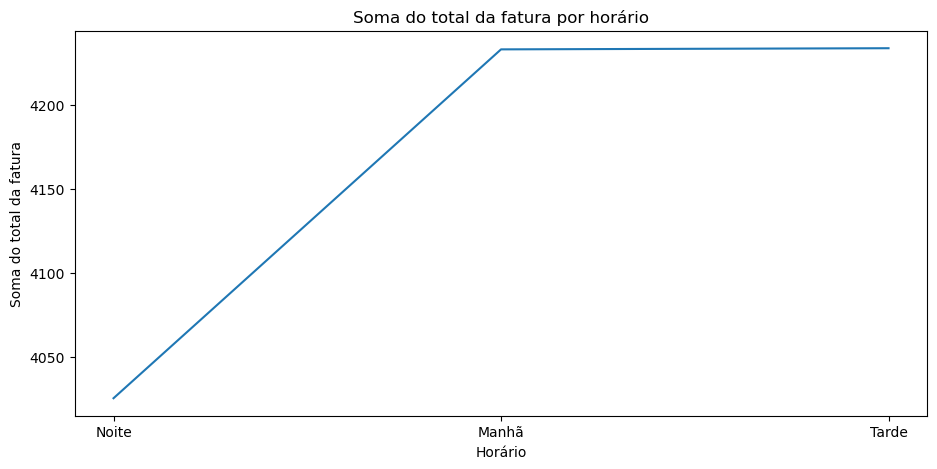

In [12]:
agrupamento = df.groupby('Tempo')['Total'].mean().reset_index('Tempo').iloc[:, :2].sort_values('Total')

# Gerando o gráfico
plt.figure(figsize=(11, 5))

plt.plot(agrupamento.Tempo, agrupamento.Total)

# Customizações
plt.xlabel('Horário')
plt.ylabel('Soma do total da fatura')
plt.title('Soma do total da fatura por horário')

plt.show()

In [13]:
agrupamento

,Tempo,Total
1,Noite,4025.737367
0,Manhã,4232.742408
2,Tarde,4233.423864


### Existe sazonalidade nas vendas com base nas datas?

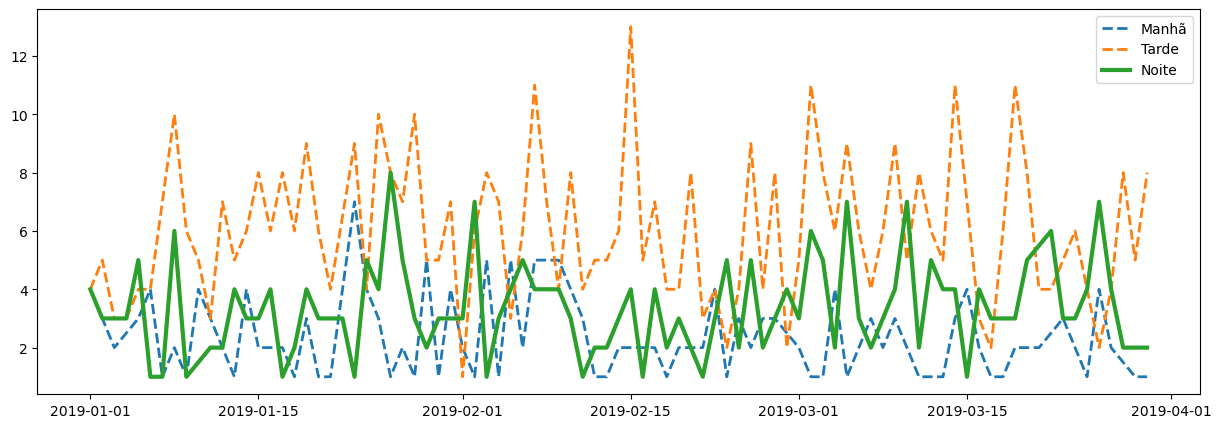

In [14]:
df.Data = pd.to_datetime( df.Data )

grupo = df.groupby(['Data', 'Tempo']).count().reset_index(['Data', 'Tempo']).iloc[:, :3]

manha = grupo.loc[ grupo.Tempo == 'Manhã' ]
tarde = grupo.loc[ grupo.Tempo == 'Tarde' ]
noite = grupo.loc[ grupo.Tempo == 'Noite' ]

# Gerando o gráfico
plt.figure(figsize=(15, 5))
           
plt.plot(manha.Data, manha.iloc[:, 2], label='Manhã', linestyle='dashed', linewidth=2)
plt.plot(tarde.Data, tarde.iloc[:, 2],label='Tarde', linestyle='dashed', linewidth=2)
plt.plot(noite.Data, noite.iloc[:, 2], label='Noite', linewidth=3)

# Customizações
plt.legend()
plt.show()

### Qual é a modalidade de pagamento mais utilizada?

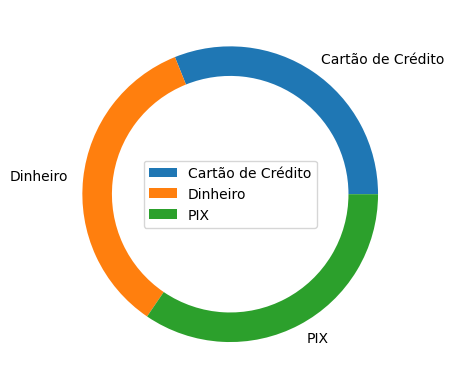

In [15]:
grupo = df.groupby('Pagamento').count().iloc[:,:1]

grupo.plot(kind='pie', subplots=True, wedgeprops=dict(width=0.20))
plt.ylabel('')
plt.show()

### Qual é a média de COGS (Custo dos Produtos Vendidos) por linha de produto?

In [16]:
df['COGS'] = df['COGS'].str.replace(',', '.').astype(float)

In [17]:
df.groupby('Linha de produto')['COGS'].mean()

Linha de produto
Acessórios eletrônicos    3850.716176
Acessórios fashions       3032.469101
Casa e estilo de vida     3119.181187
Comida e bebidas          3326.037543
Esportes e viagens        3263.875075
Saúde e beleza            2414.411053
Name: COGS, dtype: float64

### Quais são os meses do ano com maior e menor renda bruta?

In [18]:
df['Mes'] = df.Data.dt.month

df['Mes_Nome'] = [{1: 'Janeiro', 2: 'Fevereiro', 3: 'Março'}[v] for v in df.Mes]

grupo = df.groupby('Mes_Nome')['renda bruta'].sum().reset_index('Mes_Nome').iloc[:,:2]

grupo.sort_values('renda bruta')

,Mes_Nome,renda bruta
0,Fevereiro,584401.00
2,Março,684115.15
1,Janeiro,715281.40


### Há uma diferença significativa na avaliação entre diferentes filiais?

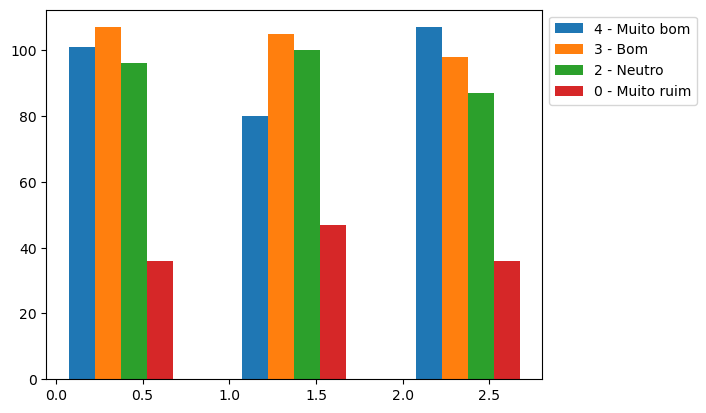

In [19]:
grupo = df.groupby(['Filial', 'Categoria_Avaliação']).count().reset_index(['Filial', 'Categoria_Avaliação']).iloc[:,:3]

largura_barras = 0.15

# Definindo as posições para cada coluna
rg = range( len(grupo.Filial.unique()) )
p1 = [v + largura_barras for v in rg]
p2 = [v + largura_barras for v in p1]
p3 = [v + largura_barras for v in p2]
p4 = [v + largura_barras for v in p3]
posicoes = [p1, p2, p3, p4]


for i, sbcat in enumerate(df.Categoria_Avaliação.unique().tolist()):

    valores_grafico = grupo.loc[ grupo.Categoria_Avaliação == sbcat ].iloc[:,2]
    plt.bar(posicoes[i], valores_grafico, largura_barras, label=sbcat)
    
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Existe uma tendência de crescimento ou declínio nas vendas ao longo do tempo?

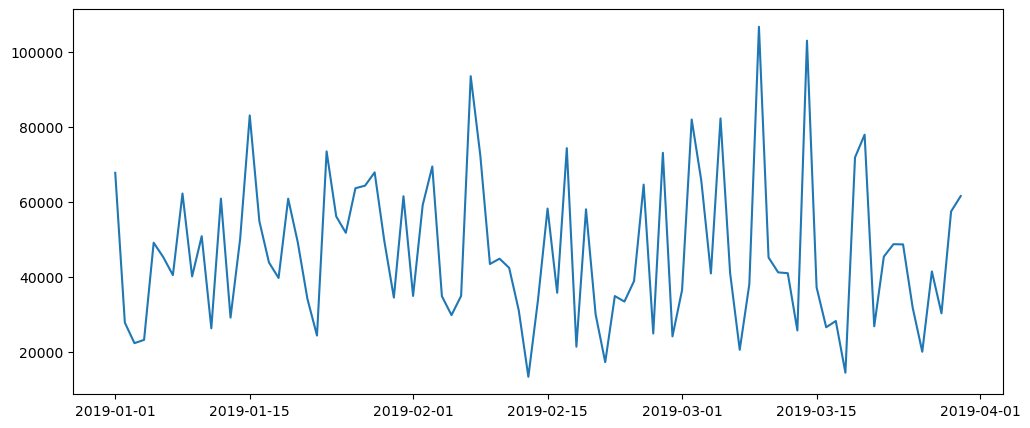

In [31]:
grupo = df.groupby('Data')['Total'].sum().reset_index('Data').iloc[:,:2]

plt.figure(figsize=(12, 5))
plt.plot(grupo['Data'].unique(), grupo['Total'])
plt.show()

# O gráfico começa a apresentar uma leve queda partindo do ponto entre as datas 2019-02-15 e 2019-03-15

### Quais são os tipos de clientes que contribuem mais para a margem bruta total?

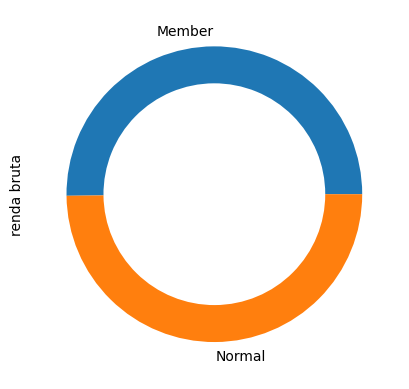

In [21]:
grupo = df.groupby('Tipo de Cliente')['renda bruta'].sum()

grupo.plot(kind='pie', subplots=True, wedgeprops=dict(width=0.25))
plt.show()